### Simple Linear Regression

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df= pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


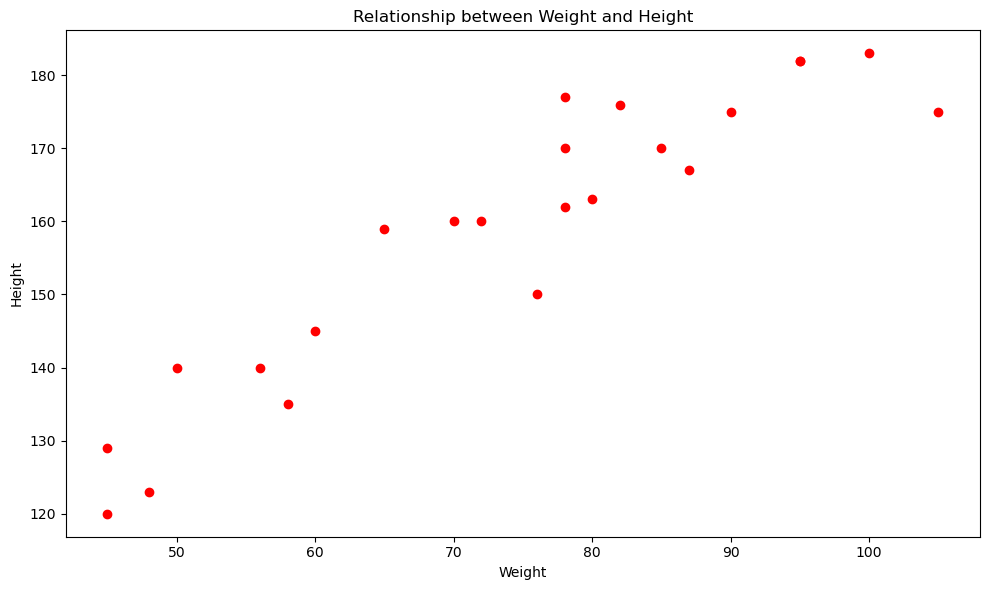

In [9]:
plt.figure(figsize = (10,6))
plt.scatter(df['Weight'], df['Height'], color ='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Relationship between Weight and Height')
plt.tight_layout()
plt.show()

#### Our aim is to create a best fit line that passes through these points with minimum differences or error to the actual points.

#### STEP 1: Divide the dataset into Independent and dependent features

In [ ]:
X=df[['Weight']] ##independent feature
y=df['Height'] ##dependent feature

#### STEP 2: Split into train and test data

In [14]:
from sklearn.model_selection import train_test_split 

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.20,random_state= 42)

In [18]:
print(X.shape,X_train.shape) ##shape of independent features

(23, 1) (18, 1)


In [20]:
print(y_train.shape,y_test.shape) ##shape of dependent features

(18,) (5,)


#### STEP 4: Standardize the data because both the features belong to different units

In [21]:
##standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [23]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test) ##always use transform X test and never do fit_transform

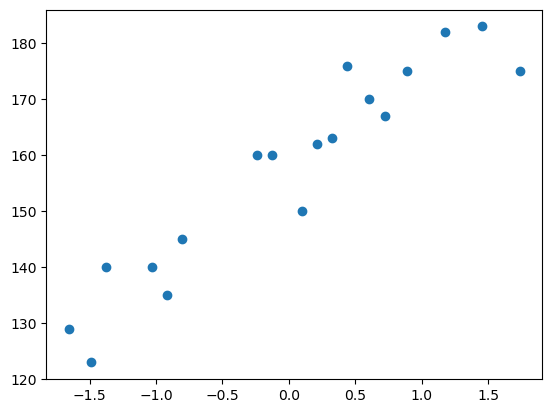

In [25]:
plt.scatter(X_train,y_train) ##as we can see the x train values are scaled down between -1.5 and +1.5

#### STEP 5: Train the model

In [26]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

#### the model calculates 2 things Slope and Intercept

In [28]:
model.coef_ ##the slope or the weight calculated by the model. For ex: y=mx+c so m is calculated here

array([17.03440872])

In [29]:
model.intercept_ ##the intercept or the base value for the dependent variable that is height when independent features are 0.
                 ## in y=mx+c the c is calculated here

157.5

In [39]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

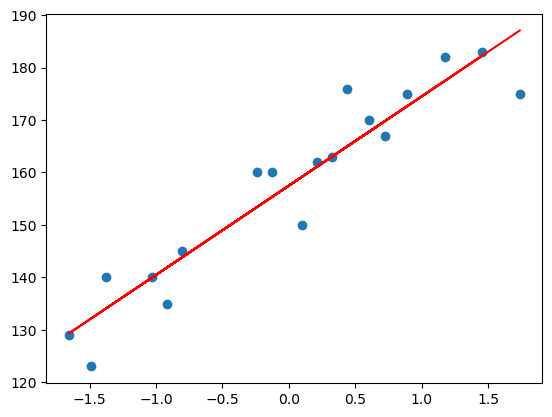

In [41]:
plt.scatter(X_train,y_train) 
plt.plot(X_train, model.predict(X_train),'r') ##we are plotting the actual x points with the y points we are getting after the model equation is applied.So by plotting this line along with scatter plot of our actual x,y points shows how best fit this line truly is or not.
                                        ## as we have m=17.3 and c= 157.5 , y= 17.3(X_train points) + 157.5

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [64]:
model.predict(X_test) ##predicted output

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [63]:
y_test ##actual output

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

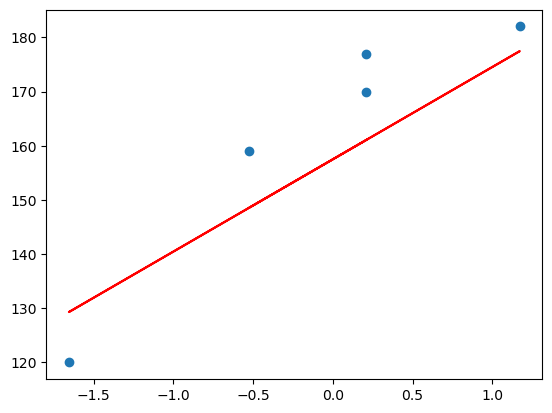

In [42]:
plt.scatter(X_test,y_test) ##plot actual test points
plt.plot(X_test,model.predict(X_test),'r')  ##plot the model fit line against the test data(x_test)

#### Performance Metrics

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [68]:
y_pred = model.predict(X_test)

In [69]:
mean_absolute_error(y_test,y_pred)

9.822657814519232

In [71]:
mse= mean_squared_error(y_test,y_pred)
mse

109.77592599051664

In [78]:
np.sqrt(mse)##rmse

10.477400726827081

## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [91]:
score= r2_score(y_test,y_pred)
score

0.776986986042344

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [92]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1) ##r2 score value wil always be greater than adjusted r2 score

0.7026493147231252

In [106]:
## new data point weight is 80
new_weight =scaler.transform([[80]])
new_weight

c:\Users\anmol\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [103]:
new_weight[0]

array([0.32350772])

In [110]:
print(model.predict(new_weight))

[163.01076266]


In [114]:
print("The height prediction for weight 80 kg is :",model.predict(new_weight))

The height prediction for weight 80 kg is : [163.01076266]


#### Assumptions need to be tested after training a model

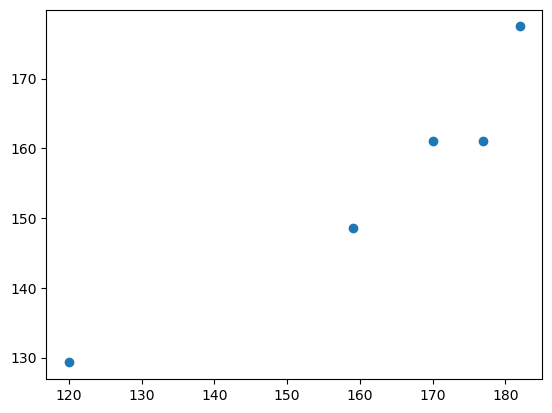

In [ ]:
## Assumptions
## plot a scatter plot for the prediction
'''as we can see the scatter plot is linearly available that is we can see a 
linear relationship between the actual and predicted y values. We can
say we have done good predictions if we get this linear relationship.'''

plt.scatter(y_test,y_pred)

In [117]:
residuals=y_test-y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\anmol\AppData\Local\Temp\ipykernel_8084\2747191050.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

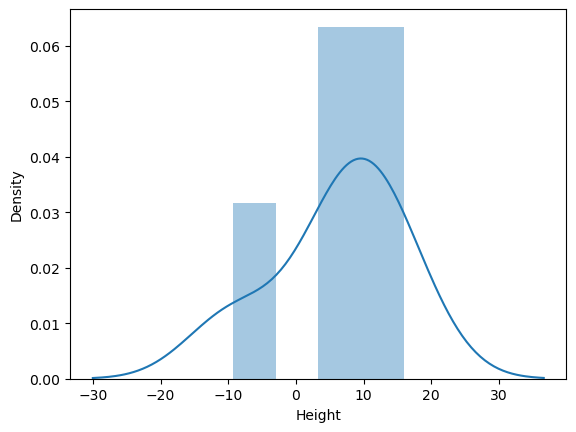

In [ ]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True) ## if we are getting normal distribution, our model is performing good.

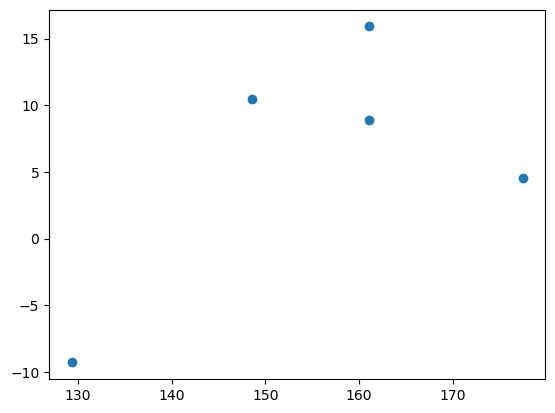

In [ ]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred,residuals)